# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
# keras.datasets.fashion_mnist


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset.

In [3]:
class_names = ['T-shirt/Top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
dataset = keras.datasets.fashion_mnist.load_data()

In [5]:
dataset


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)  # (60000, 28, 28) - 60,000 imágenes de 28x28
print(X_test.shape)   # (10000, 28, 28) - 10,000 imágenes de 28x28
print(y_train.shape)  # (60000,) - 60,000 etiquetas
print(y_test.shape)   # (10000,) - 10,000 etiquetas

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [7]:
X_train.shape[0]

60000

In [8]:
X_test.shape[0]

10000

In [9]:
X_train.shape[1]*X_train.shape[2]

784

In [10]:
28*28

784

In [11]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

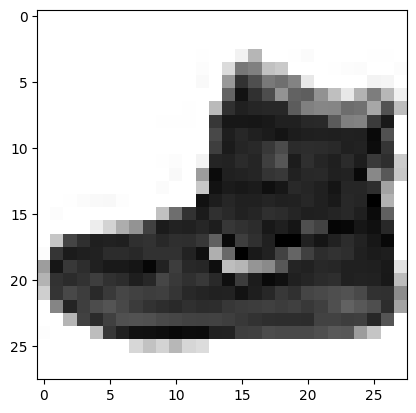

In [12]:
plt.imshow(X_train[0], cmap='binary')

In [13]:
class_names[y_train[0]]

'Ankle boot'

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [14]:
print(X_train.min())
print(X_train.max())

0
255


In [15]:
X_train = X_train / 255 
X_test = X_test / 255 

In [16]:
print(X_train.min())
print(X_train.max())

0.0
1.0


Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

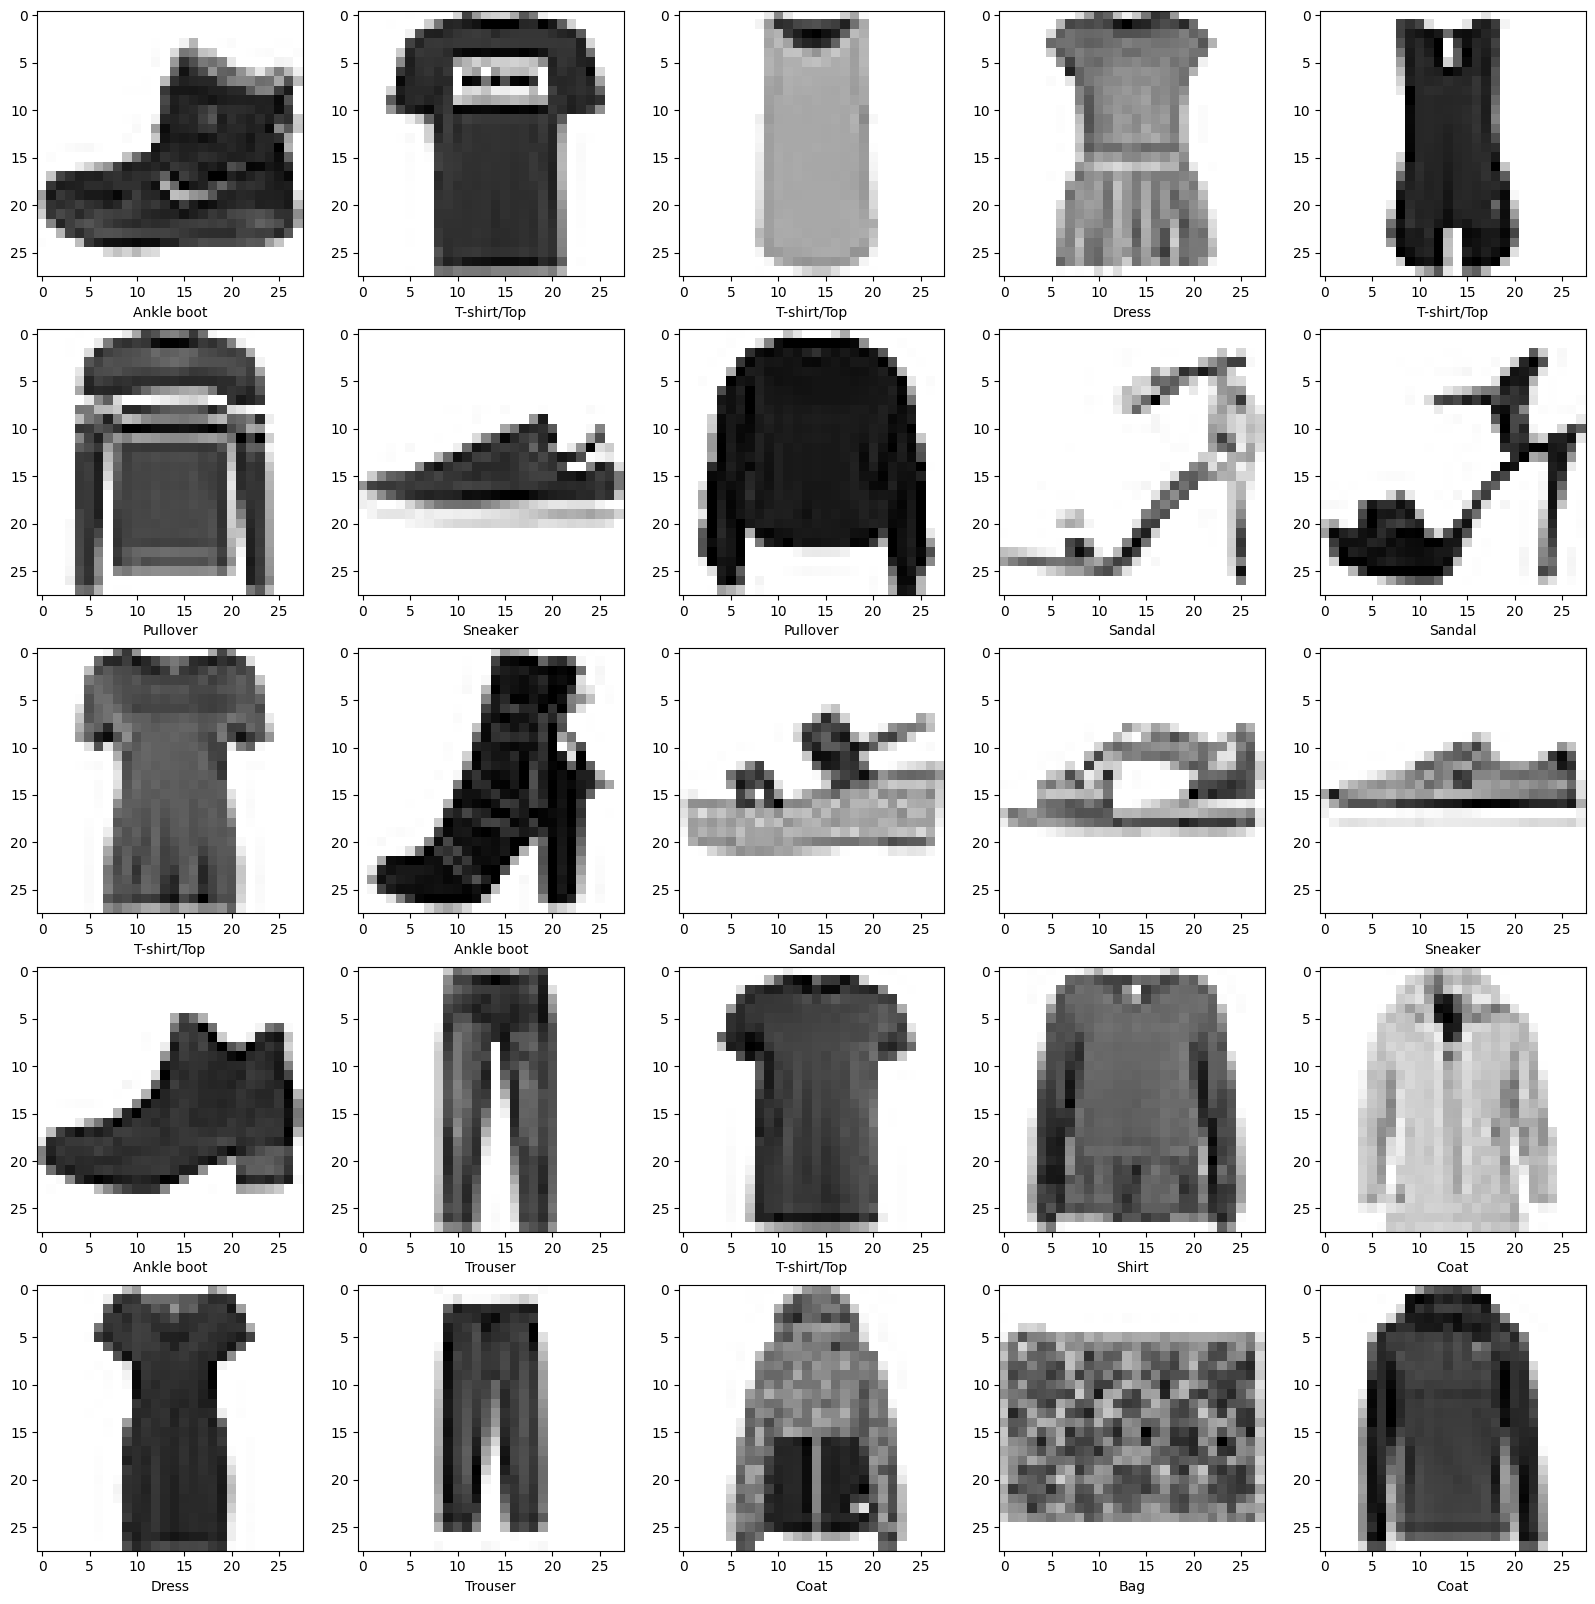

In [17]:
plt.figure(figsize=(20,20))

for i in range(25):
    plt.subplot(5, 5, i +1)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [18]:
# Usamos Sequential: apila capas una tras otra de forma lineal
model = keras.Sequential([
    
    # CAPA 1: Flatten (Aplanar)
    # Convierte las imágenes 2D (28x28) en un vector 1D de 784 elementos
    # input_shape=(28,28) especifica las dimensiones de entrada
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # CAPA 2: Dense (Densa) con 256 neuronas
    # Primera capa oculta totalmente conectada
    # Cada neurona recibe información de todos los 784 píxeles
    # Sin función de activación explícita, usa por defecto activación lineal
    keras.layers.Dense(256),
    
    # CAPA 3: Dense con 128 neuronas
    # Segunda capa oculta que reduce gradualmente las dimensiones
    keras.layers.Dense(128),
    
    # CAPA 4: Dropout del 20%
    # Regularización: apaga aleatoriamente el 20% de las neuronas durante el entrenamiento
    # Previene el overfitting (sobreajuste) al hacer el modelo más robusto
    keras.layers.Dropout(0.2),
    
    # CAPA 5: Dense con 32 neuronas
    # Tercera capa oculta, sigue reduciendo dimensionalidad
    keras.layers.Dense(32),
    
    # CAPA 6 (SALIDA): Dense con 10 neuronas y activación softmax
    # 10 neuronas = 10 clases de ropa
    # softmax: convierte los valores en probabilidades que suman 1
    # Cada neurona representa la probabilidad de pertenecer a una clase
    keras.layers.Dense(10, activation="softmax")
])

#red neuronal = entrada 784 - 256 -128 - dropout - 32 - 10(salida)

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [19]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [ ]:
eearlystopping = keras.callbacks.EarlyStopping(patience=5)

In [22]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    callbacks=[eearlystopping]
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7070 - loss: 0.8313
Epoch 2/20
 67/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.6240

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8008 - loss: 0.5769
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8180 - loss: 0.5270
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.5020
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8321 - loss: 0.4848
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8373 - loss: 0.4726
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8397 - loss: 0.4632
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8416 - loss: 0.4566
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.4519
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.4456
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8471 - loss: 0.4422
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.4377
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8413 - loss: 0.4490


[0.4490394592285156, 0.8413000106811523]

In [24]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


array([[1.2890559e-06, 7.2054952e-08, 6.8841655e-06, ..., 6.1213482e-02,
        4.5419256e-03, 8.8112289e-01],
       [5.7791168e-04, 1.1183840e-06, 9.5073581e-01, ..., 1.7117859e-12,
        2.7132684e-05, 2.3856772e-11],
       [7.5554822e-06, 9.9997568e-01, 1.8643362e-06, ..., 1.9188673e-09,
        4.2958259e-08, 2.7067876e-11],
       ...,
       [9.7829692e-02, 2.3921311e-06, 1.5811287e-03, ..., 2.0505040e-05,
        5.6781703e-01, 5.4387567e-07],
       [1.6405675e-06, 9.9983752e-01, 1.7550688e-06, ..., 1.4656004e-07,
        2.3945994e-08, 3.0084962e-07],
       [8.0221354e-05, 4.9083847e-05, 2.4218282e-04, ..., 3.2941423e-02,
        1.0563135e-02, 2.1299804e-03]], shape=(10000, 10), dtype=float32)

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [25]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[1.2890559e-06, 7.2054952e-08, 6.8841655e-06, ..., 6.1213482e-02,
        4.5419256e-03, 8.8112289e-01],
       [5.7791168e-04, 1.1183840e-06, 9.5073581e-01, ..., 1.7117859e-12,
        2.7132684e-05, 2.3856772e-11],
       [7.5554822e-06, 9.9997568e-01, 1.8643362e-06, ..., 1.9188673e-09,
        4.2958259e-08, 2.7067876e-11],
       ...,
       [9.7829692e-02, 2.3921311e-06, 1.5811287e-03, ..., 2.0505040e-05,
        5.6781703e-01, 5.4387567e-07],
       [1.6405675e-06, 9.9983752e-01, 1.7550688e-06, ..., 1.4656004e-07,
        2.3945994e-08, 3.0084962e-07],
       [8.0221354e-05, 4.9083847e-05, 2.4218282e-04, ..., 3.2941423e-02,
        1.0563135e-02, 2.1299804e-03]], shape=(10000, 10), dtype=float32)

In [26]:
np.round(y_pred, 2)

array([[0.  , 0.  , 0.  , ..., 0.06, 0.  , 0.88],
       [0.  , 0.  , 0.95, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.1 , 0.  , 0.  , ..., 0.  , 0.57, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.03, 0.01, 0.  ]],
      shape=(10000, 10), dtype=float32)

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [27]:
np.round(y_pred[0], 2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.06, 0.  , 0.88],
      dtype=float32)

In [29]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([9, 2, 1, ..., 8, 1, 5], shape=(10000,))

In [30]:
y_pred_labels[0]

np.int64(9)

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [31]:
# ============================================================
# FUNCIONES AUXILIARES PARA VISUALIZACIÓN DE PREDICCIONES
# ============================================================

def plot_image(i, predictions_array, true_label, img):
    """
    Visualiza una imagen con su predicción y etiqueta verdadera
    
    Args:
        i: índice de la imagen
        predictions_array: array de probabilidades predichas
        true_label: etiquetas verdaderas
        img: array de imágenes
    """
    # Extraemos los valores específicos de esta imagen
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    
    # Configuración visual
    plt.grid(False)  # Sin cuadrícula
    plt.xticks([])   # Sin ticks en eje x
    plt.yticks([])   # Sin ticks en eje y
    
    # Mostramos la imagen en escala de grises
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Encontramos la clase con mayor probabilidad
    predicted_label = np.argmax(predictions_array)
    
    # Código de color: AZUL si es correcto, ROJO si es incorrecto
    if predicted_label == true_label:
        color = 'blue'  # Predicción correcta
    else:
        color = 'red'   # Predicción incorrecta
    
    # Etiqueta en formato: "ClasePredicha Probabilidad% (ClaseVerdadera)"
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),  # Probabilidad más alta
        class_names[true_label]
    ), color=color)


def plot_value_array(i, predictions_array, true_label):
    """
    Visualiza un gráfico de barras con las probabilidades de cada clase
    
    Args:
        i: índice de la imagen
        predictions_array: array de probabilidades predichas
        true_label: etiquetas verdaderas
    """
    predictions_array, true_label = predictions_array, true_label[i]
    
    # Configuración visual
    plt.grid(False)
    plt.xticks(range(10))  # 0 a 9 en el eje x (una para cada clase)
    plt.yticks([])
    
    # Gráfico de barras con las 10 probabilidades
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])  # Eje y de 0 a 1 (probabilidades)
    
    predicted_label = np.argmax(predictions_array)
    
    # Coloreamos las barras:
    # ROJO: la clase predicha por el modelo
    # AZUL: la clase verdadera
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

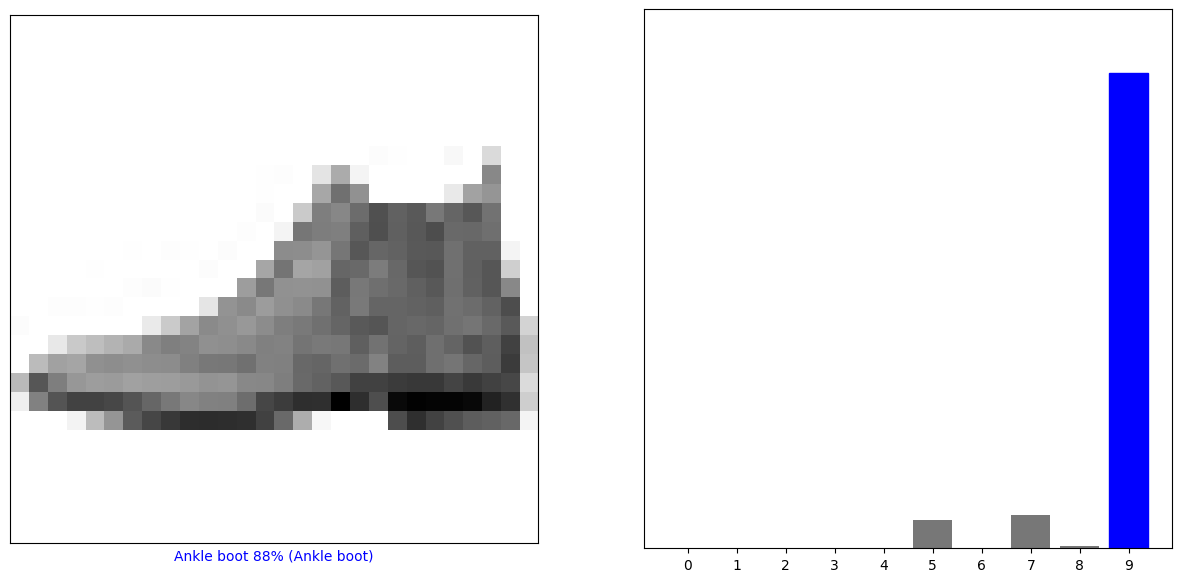

In [32]:
i = 0  # Índice de la imagen a visualizar
plt.figure(figsize=(15, 7))

# Subplot 1: Imagen con la predicción
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plot_image(i, y_pred[i], y_test, X_test)

# Subplot 2: Gráfico de barras con las probabilidades
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plot_value_array(i, y_pred[i], y_test)

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

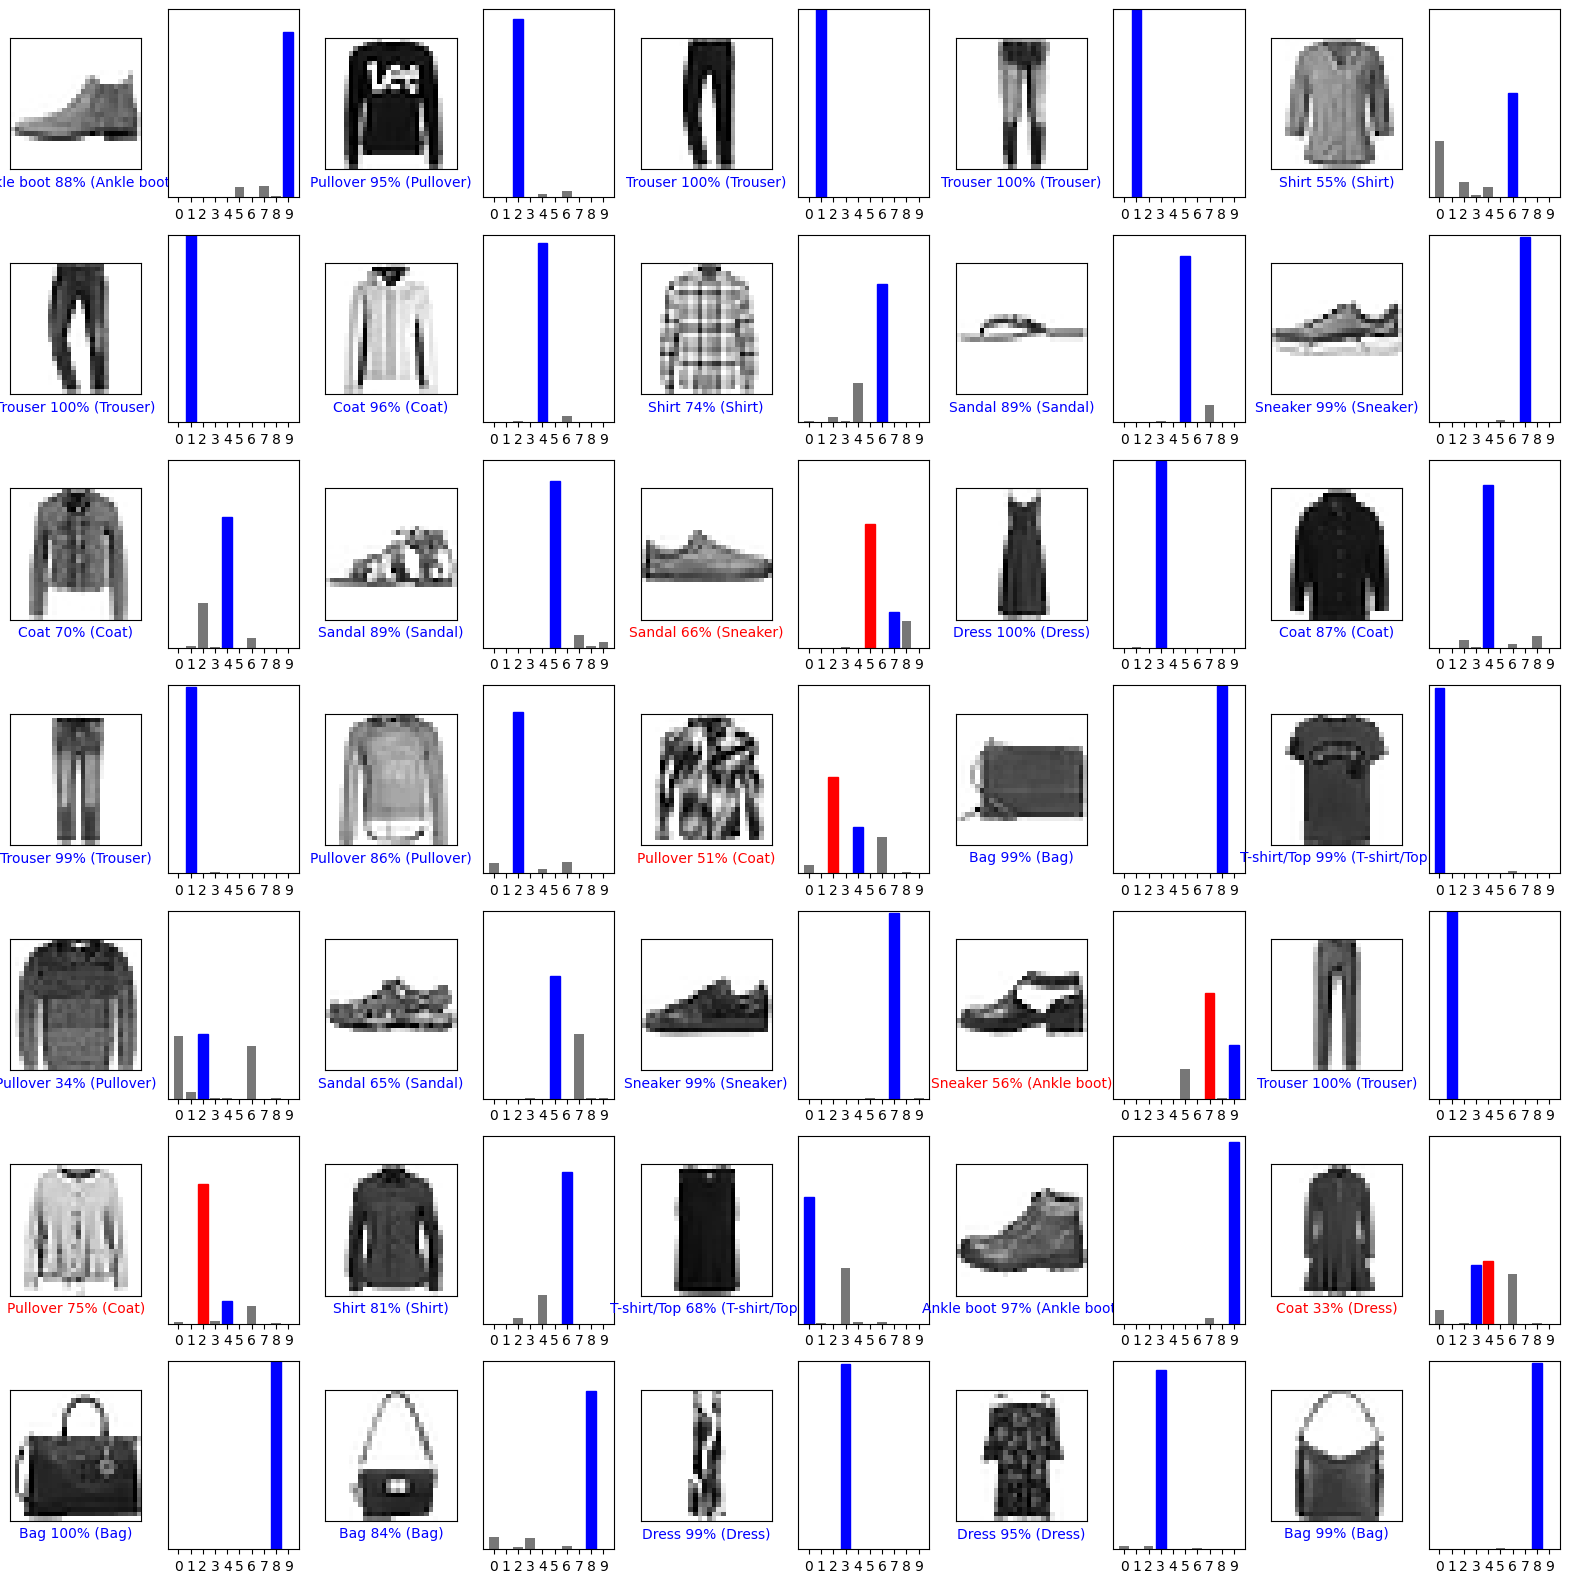

In [33]:
# Configuración del grid
n_rows = 7  # 7 filas
n_cols = 5  # 5 columnas
n_img = n_rows * n_cols  # Total: 35 imágenes

plt.figure(figsize=(20, 20))

# Para cada una de las primeras 35 imágenes
for i in range(n_img):
    # Subplot para la imagen (posiciones impares: 1, 3, 5, ...)
    plt.subplot(n_rows, n_cols * 2, 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    
    # Subplot para el gráfico de barras (posiciones pares: 2, 4, 6, ...)
    plt.subplot(n_rows, n_cols * 2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)



Evalúa tu modelo con una matriz de confusión e interprétala.

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
c_mat = confusion_matrix(y_test, y_pred_labels, normalize='true')


<Axes: >

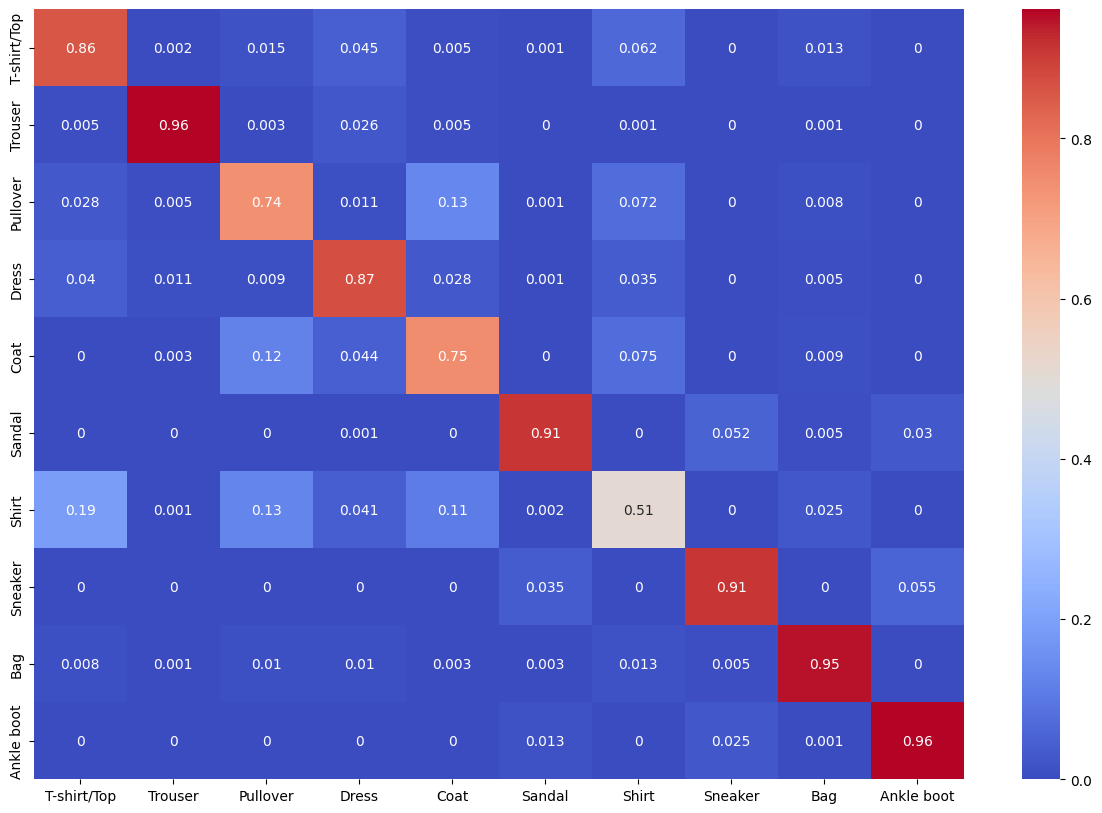

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    c_mat, 
    annot=True,  # Muestra los valores numéricos en cada celda
    xticklabels=class_names,  # Nombres de clases en eje X
    yticklabels=class_names,  # Nombres de clases en eje Y
    cmap="coolwarm"  # Paleta de colores: azul (bajo) a rojo (alto)
)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.75      0.74      1000
           5       0.94      0.91      0.93      1000
           6       0.66      0.51      0.57      1000
           7       0.92      0.91      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [41]:
model.predict(X_test[50:51])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[6.51550665e-03, 4.45627702e-05, 2.81128705e-01, 1.77476075e-04,
        3.72239351e-01, 6.37048899e-13, 3.38418096e-01, 1.53804356e-12,
        1.47632859e-03, 1.45735495e-08]], dtype=float32)

In [42]:
print("Esta imagen contiene un", class_names[np.argmax(model.predict(X_test[50:51]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Esta imagen contiene un Coat


In [45]:
# ============================================================
# MODELO MEJORADO: Experimentación con arquitectura más compleja
# ============================================================
earlystopping = keras.callbacks.EarlyStopping(patience=5)
# Construimos un segundo modelo con técnicas avanzadas de regularización
model_2 = keras.Sequential([
    
    # CAPA 1: Flatten - Misma entrada que el modelo anterior
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # CAPA 2: Dense con 512 neuronas (más grande que antes)
    keras.layers.Dense(512),
    
    # CAPA 3: Dropout 20% - Previene overfitting
    keras.layers.Dropout(0.2),
    
    # CAPA 4: Dense con 1024 neuronas (capa muy grande)
    keras.layers.Dense(1024),
    
    # CAPA 5: Dropout 20%
    keras.layers.Dropout(0.2),
    
    # CAPA 6: Dense con 256 neuronas + REGULARIZACIÓN DOBLE
    # - kernel_regularizer=L1: penaliza pesos grandes (fomenta sparsity)
    # - activity_regularizer=L2: penaliza activaciones grandes
    # Ambos ayudan a prevenir overfitting
    keras.layers.Dense(
        256, 
        kernel_regularizer=keras.regularizers.L1(0.01),
        activity_regularizer=keras.regularizers.L2(0.01)
    ),
    
    # CAPA 7: Dropout 20%
    keras.layers.Dropout(0.2),
    
    # CAPA 8: Dense con 64 neuronas
    keras.layers.Dense(64),
    
    # CAPA 9: Dropout 20%
    keras.layers.Dropout(0.2),
    
    # CAPA 10: Dense con 32 neuronas
    keras.layers.Dense(32),
    
    # CAPA 11 (SALIDA): 10 neuronas con softmax
    keras.layers.Dense(10, activation="softmax")
])

# COMPILACIÓN del modelo 2
model_2.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ENTRENAMIENTO del modelo 2
# Diferencias con el modelo 1:
# - batch_size=64 (más pequeño → más actualizaciones por época)
# - epochs=50 (más épocas máximas)
# - Mismo early stopping (patience=5)
history = model_2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.1,
    callbacks=[earlystopping]
)

# EVALUACIÓN del modelo 2
# Comparar este resultado con el del modelo 1 (~83.9%)
# ¿La arquitectura más compleja mejoró el rendimiento?
model_2.evaluate(X_test, y_test)

Epoch 1/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1050 - val_loss: nan
Epoch 2/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1050 - val_loss: nan
Epoch 3/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1050 - val_loss: nan
Epoch 4/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1050 - val_loss: nan
Epoch 5/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1050 - val_loss: nan
Epoch 6/50
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.1050 - val_loss: nan
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: nan


[nan, 0.10000000149011612]